KNN Classifier Model

In [1]:
# Libraries and modules

import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Configuration and feature extraction

BASE_DIR = Path.cwd() if 'notebooks' not in str(Path.cwd()) else Path.cwd().parent
DATA_DIR = BASE_DIR / 'data'
FEATURES_DIR = DATA_DIR / 'features' / 'birdcall_features_song.csv'
RANDOM_STATE = 42

def extract_features(features_path):
    df = pd.read_csv(features_path)
    return df

In [2]:
# Preprocessing and scaling

def preprocess_data(df):
    X = df.select_dtypes(include=[np.number])       # Only numeric columns
    y = df['species']                               # Target variable    
    
    scaler = StandardScaler()                       # Standardize features
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler


# Data split --> test and train

def split_data(X, y):
    return train_test_split(X, y, test_size=0.30, stratify=y, random_state=RANDOM_STATE)

In [3]:
# Train KNN Classifier --> tune hyperparameters

def train_knn(X_train, y_train):
    param_grid = {
        'n_neighbors': list(range(50, 201)),        # Number of neighbors
        'weights': ['uniform', 'distance'],         # Weight function
    }

    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    print(f"Best parameters: {grid.best_params_}")
    print(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']])
    print(f"Best score: {grid.best_score_}")

    return grid.best_estimator_


# Evaluate Model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(xticks_rotation=45, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

c:\UPF\Taller de Tecnologia Musical\Birdify\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\UPF\Taller de Tecnologia Musical\Birdify\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best parameters: {'n_neighbors': 53, 'weights': 'distance'}
                                          params  mean_test_score
0      {'n_neighbors': 50, 'weights': 'uniform'}         0.287429
1     {'n_neighbors': 50, 'weights': 'distance'}         0.345143
2      {'n_neighbors': 51, 'weights': 'uniform'}         0.283429
3     {'n_neighbors': 51, 'weights': 'distance'}         0.346857
4      {'n_neighbors': 52, 'weights': 'uniform'}         0.282857
..                                           ...              ...
297  {'n_neighbors': 198, 'weights': 'distance'}         0.269143
298   {'n_neighbors': 199, 'weights': 'uniform'}         0.189143
299  {'n_neighbors': 199, 'weights': 'distance'}         0.268000
300   {'n_neighbors': 200, 'weights': 'uniform'}         0.189143
301  {'n_neighbors': 200, 'weights': 'distance'}         0.269143

[302 rows x 2 columns]
Best score: 0.3485714285714286

Classification Report:
                            precision    recall  f1-score   support



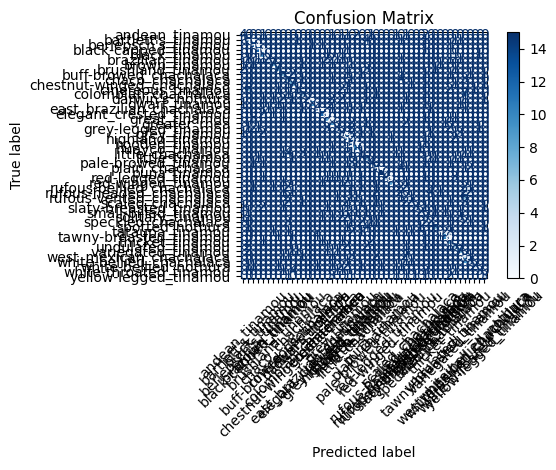

Train accuracy: 1.00
Test accuracy: 0.37


In [4]:
# Main function

def main():
    df = extract_features(FEATURES_DIR)
    X_scaled, y, _ = preprocess_data(df)
    X_train, X_test, y_train, y_test = split_data(X_scaled, y)
    model = train_knn(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
    print(f"Test accuracy: {model.score(X_test, y_test):.2f}")

if __name__ == "__main__":
    main()